In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as image
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

sns.set_style("whitegrid")

In [3]:
cpath = 'data/map/cm_commune.json'
cm = gpd.read_file(cpath)

In [4]:
dpath = 'data/map/cm_district.json'
district = gpd.read_file(dpath)

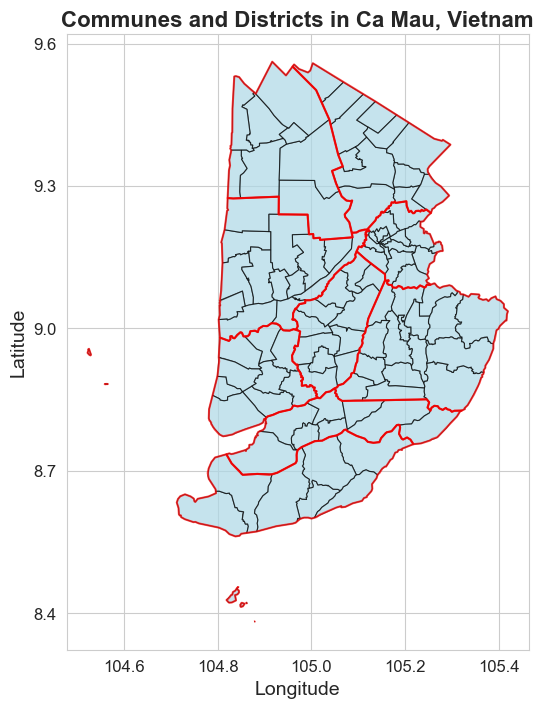

In [5]:
# Create a larger figure for better readability
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plotting communes with boundaries
cm.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.8, alpha=0.7)

# Plotting districts with boundaries
district.plot(ax=ax, color='none', edgecolor='red', linewidth=1.5, alpha=0.7)

# Enhancing the plot for publication quality
ax.set_title('Communes and Districts in Ca Mau, Vietnam', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Show the plot
plt.show()

In [6]:
dt = pd.read_excel('data/dongthap.xlsx')

# Dropping unnecessary columns and rows that contain NaN values
dt = dt.dropna(axis=1, how='all')  # Drop columns with all NaN values
dt = dt.dropna(axis=0, how='all')  # Drop rows with all NaN values

# Renaming columns based on the actual data structure
# The number of column names should match the number of columns in the DataFrame
column_names = dt.columns[:len(dt.columns)]  # Adjusting to the correct number of columns
dt.columns = column_names

dt.columns = ['Code', 'Name', 'Level', 'Population']

In [7]:
dt['Name'] = dt['Name'].str.replace('Huyện ', '').str.replace('Thành phố ', '')

In [8]:
dt['Name'] = dt['Name'].str.replace(' ', '')

In [9]:
country = gpd.read_file('data/map/vietnam.json')

In [10]:
country['is_camau'] = country['VARNAME_1'] == 'CaMau'

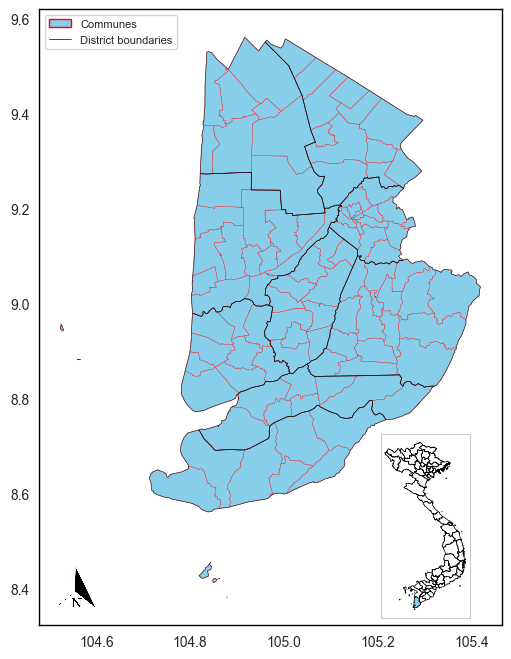

In [11]:
# Assuming 'gdf_communes' and 'gdf_districts' are your GeoDataFrames for communes and districts respectively
# And assuming 'gdf' is the GeoDataFrame for the entire country with a column 'is_camau' for Ca Mau province

# Set the background color for both the main and inset maps
background_color = 'white'

# Creating the main district and commune map
fig_district, ax_district = plt.subplots(figsize=(8, 8))
ax_district.set_facecolor(background_color)

# Plotting communes with sky blue fill and red edges
cm.plot(ax=ax_district, color='skyblue', edgecolor='red', linewidth=0.25)

# Plotting district boundaries in black
district.plot(ax=ax_district, color='none', edgecolor='black', linewidth=0.5, alpha=0.7)

# Creating the inset map
inset_ax = inset_axes(ax_district, width="30%", height="30%", loc=4)  # Bottom right corner
inset_ax.patch.set_facecolor(background_color)
country.plot(ax=inset_ax, color=background_color, edgecolor='black', linewidth=0.5)
country[country['is_camau']].plot(ax=inset_ax, color='skyblue', edgecolor='black', linewidth=0.5)
inset_ax.set_xticks([])
inset_ax.set_yticks([])

for spine in ax_district.spines.values():
    spine.set_linewidth(1)  # Making the border lines solid
    spine.set_edgecolor('black')  # Setting the border color to black

for spine in inset_ax.spines.values():
    spine.set_visible(True)  

# Removing gridlines
ax_district.grid(False)
inset_ax.grid(False)

# Custom legend for the map with reduced font size
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='red', label='Communes'),
    Line2D([0], [0], color='black', linewidth=0.5, linestyle='-', label='District boundaries')
]
# Adding the custom legend to the plot with a reduced font size
ax_district.legend(handles=legend_elements, loc='upper left', fontsize=8)
arrow_img = image.imread('docs/arrow.png')
# Adding the arrow to the bottom left
arrow_position = (0.08, 0.06)  # Adjust as needed
arrowbox = OffsetImage(arrow_img, zoom=0.05)
ab = AnnotationBbox(arrowbox, arrow_position, xycoords='axes fraction', frameon=False)
ax_district.add_artist(ab)
plt.savefig('output_plot.png', dpi=300, bbox_inches='tight')

plt.show()
